# **Uni-Variate Feature CO(GT) Analysis**

In [3]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

Ora carico il dataset normale:

In [4]:
dataframe = pd.read_csv('dataTS.csv', sep = ',', skipinitialspace=True, keep_default_na=True)

In [5]:
dataframe.head()

,DateTime,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
0,2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
1,2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
2,2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
3,2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
4,2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


In [6]:
dataframe.dtypes

DateTime         object
CO(GT)          float64
PT08.S1(CO)     float64
NOx(GT)         float64
NO2(GT)         float64
PT08.S4(NO2)    float64
T               float64
Weekend           int64
dtype: object

ora vado a convertire DateTime in formato data e poi la metto come indice:

In [7]:
dataframe['DateTime']=pd.to_datetime(dataframe.DateTime)

In [8]:
dataframe.dtypes

DateTime        datetime64[ns]
CO(GT)                 float64
PT08.S1(CO)            float64
NOx(GT)                float64
NO2(GT)                float64
PT08.S4(NO2)           float64
T                      float64
Weekend                  int64
dtype: object

In [9]:
dataframe.head()

,DateTime,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
0,2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
1,2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
2,2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
3,2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
4,2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


In [10]:
dataframe.shape

(744, 8)

Ora che abbiamo DateTime nel formato giusto settiamolo come Indice:

In [11]:
dataframe = dataframe.set_index(['DateTime'])


In [12]:
dataframe.head()

,CO(GT),PT08.S1(CO),NOx(GT),NO2(GT),PT08.S4(NO2),T,Weekend
DateTime,,,,,,,
2004-10-01 00:00:00,1.9,1176.0,206.000000,91.000000,1572.0,20.3,0
2004-10-01 01:00:00,1.6,1137.0,140.000000,74.000000,1557.0,19.4,0
2004-10-01 02:00:00,1.3,1035.0,132.000000,69.000000,1465.0,19.0,0
2004-10-01 03:00:00,0.8,943.0,246.896735,113.091251,1348.0,20.2,0
2004-10-01 04:00:00,0.6,904.0,81.000000,54.000000,1326.0,19.8,0


## Create Dataset for Uni-Variate Analysis

Since from MOTIF and DISCORD analyzes no variable came out clearly better than the other, the choice of CO (GT) was made according to the choices of the previous sections





for univariate analysis we have created a dedicated dataframe, dfUni, which collects the values ​​of the variable CO (GT) in the month of October with the index of the dataset the variable "DateTime"


In [13]:
dfUni = dataframe[['CO(GT)','Weekend']]
dfUni.head()

,CO(GT),Weekend
DateTime,,
2004-10-01 00:00:00,1.9,0
2004-10-01 01:00:00,1.6,0
2004-10-01 02:00:00,1.3,0
2004-10-01 03:00:00,0.8,0
2004-10-01 04:00:00,0.6,0


In [16]:
dfUni.tail()

,CO(GT),Weekend
DateTime,,
2004-10-31 19:00:00,4.7,1
2004-10-31 20:00:00,4.1,1
2004-10-31 21:00:00,4.1,1
2004-10-31 22:00:00,2.7,1
2004-10-31 23:00:00,2.6,1


In [15]:
dfUni.shape

(744, 2)

Given some anomalies present within the surveys of the variable CON (GT) (see discord section) we concentrated on the last week of October for univariate analysis


In [18]:
day_1 = dfUni['2004-10-25']
day_2 = dfUni['2004-10-26']
day_3 = dfUni['2004-10-27']
day_4 = dfUni['2004-10-28']
day_5 = dfUni['2004-10-29']
day_6 = dfUni['2004-10-30']
day_7 = dfUni['2004-10-31']

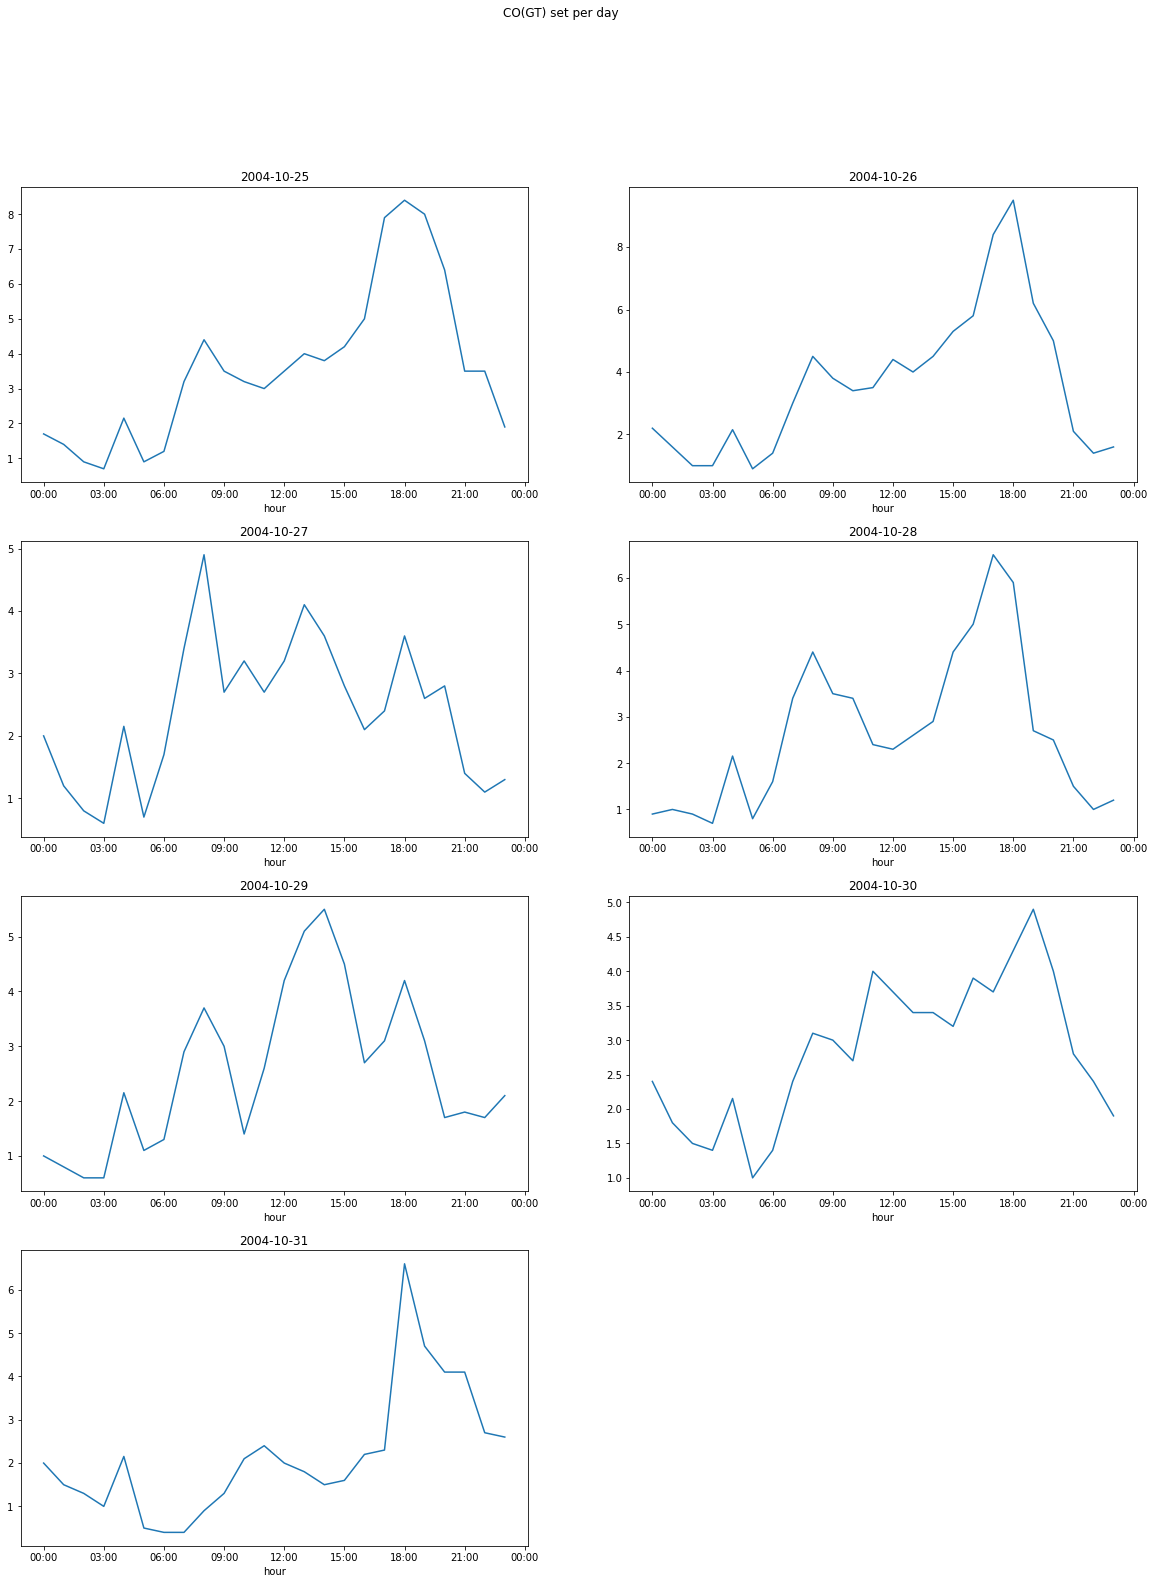

In [23]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(4, 2, figsize=(20,25))
axs[-1, -1].axis('off')
fig.suptitle('CO(GT) set per day')
xfmt = mdates.DateFormatter('%H:%M')

axs[0,0].plot(day_1['CO(GT)'])
axs[0,0].xaxis.set_major_formatter(xfmt)
axs[0,0].set_xlabel('hour')
axs[0,0].set_title('2004-10-25')

axs[0,1].plot(day_2['CO(GT)'])
axs[0,1].xaxis.set_major_formatter(xfmt)
axs[0,1].set_xlabel('hour')
axs[0,1].set_title('2004-10-26')

axs[1,0].plot(day_3['CO(GT)'])
axs[1,0].xaxis.set_major_formatter(xfmt)
axs[1,0].set_xlabel('hour')
axs[1,0].set_title('2004-10-27')

axs[1,1].plot(day_4['CO(GT)'])
axs[1,1].xaxis.set_major_formatter(xfmt)
axs[1,1].set_xlabel('hour')
axs[1,1].set_title('2004-10-28')

axs[2,0].plot(day_5['CO(GT)'])
axs[2,0].xaxis.set_major_formatter(xfmt)
axs[2,0].set_xlabel('hour')
axs[2,0].set_title('2004-10-29')

axs[2,1].plot(day_6['CO(GT)'])
axs[2,1].xaxis.set_major_formatter(xfmt)
axs[2,1].set_xlabel('hour')
axs[2,1].set_title('2004-10-30')

axs[3,0].plot(day_7['CO(GT)'])
axs[3,0].xaxis.set_major_formatter(xfmt)
axs[3,0].set_xlabel('hour')
axs[3,0].set_title('2004-10-31')

plt.show()

Abbiamo tutti i grafici giornalieri di CO(GT) di ultima settimana, provo a fare un grafico unico:

In [24]:
day_1.reset_index(drop=True, inplace=True)
day_2.reset_index(drop=True, inplace=True)
day_3.reset_index(drop=True, inplace=True)
day_4.reset_index(drop=True, inplace=True)
day_5.reset_index(drop=True, inplace=True)
day_6.reset_index(drop=True, inplace=True)
day_7.reset_index(drop=True, inplace=True)

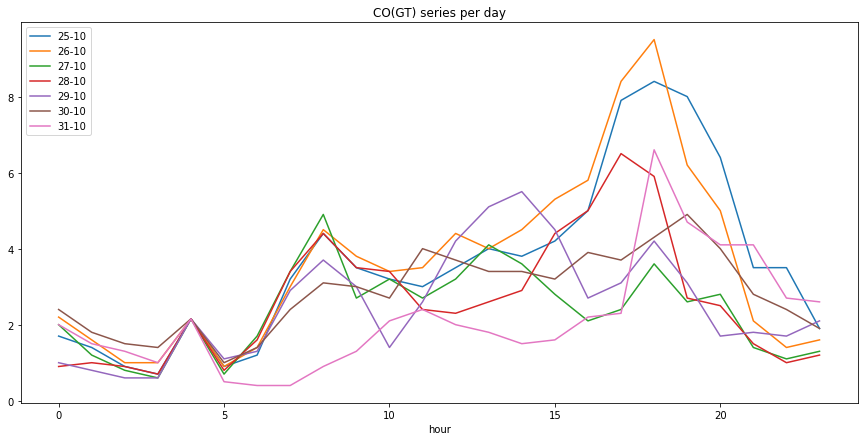

In [35]:
plt.figure(figsize=(15,7))
plt.plot(day_1['CO(GT)'])
plt.plot(day_2['CO(GT)'])
plt.plot(day_3['CO(GT)'])
plt.plot(day_4['CO(GT)'])
plt.plot(day_5['CO(GT)'])
plt.plot(day_6['CO(GT)'])
plt.plot(day_7['CO(GT)'])
plt.xlabel('hour')
plt.legend(['25-10','26-10','27-10','28-10','29-10','30-10','31-10'], loc = 'upper left')
plt.title('CO(GT) series per day')
plt.show()

After that, The series was prepared by applying techniques for the removal of noise, with this results:

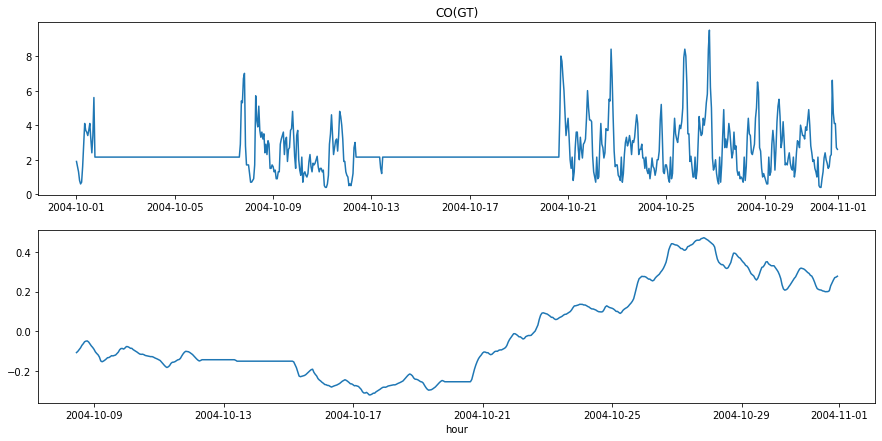

In [41]:
w = 180
plt.figure(figsize=(15,7))
plt.subplot(212)
dfUni_denoised = ((dfUni['CO(GT)']-dfUni['CO(GT)'].mean())/dfUni['CO(GT)'].std()).rolling(window=w).mean()
plt.plot(df_denoised)
plt.xlabel('hour')

plt.subplot(211)
plt.plot(dfUni['CO(GT)'])

plt.title('CO(GT)')
plt.show()

Qua sopra ho messo entrambi i grafici della varaiible CO(GT) sia con rumore (situazione inziaile) sia con rumore rimosso, guardiamo se usarli entrambi o far vedere solo come è andamento della variaible senza rumore.

After, Using the approach based on moving averages, we went to the
search for any trend and seasonality components, which, however, we do not have significant results as shown in the graph below.
Later we will try other approaches to identify trend and seasonality components.

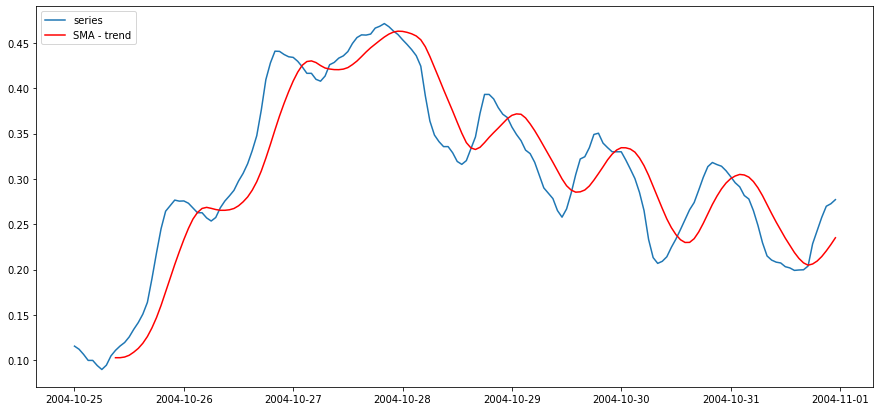

In [56]:
ts = dfUni_denoised.loc['2004-10-25':'2004-10-31']
sma = ts.rolling(window = 10).mean()       #simple moving average, non so perchè 10, non ho capito
plt.figure(figsize=(15,7))
plt.plot(ts)
plt.plot(sma, c = 'red')
plt.legend(['series','SMA - trend'], loc = 'upper left')   
plt.show()